In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 122us/step - loss: 0.2625 - acc: 0.9240
Epoch 2/3
60000/60000 [==============================] - 6s 108us/step - loss: 0.1055 - acc: 0.9677 0s - loss: 0.1057 - acc: 0.9
Epoch 3/3
60000/60000 [==============================] - 7s 116us/step - loss: 0.0722 - acc: 0.9772


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 54us/step
0.09353524294933305 0.9722


In [3]:
model.save('mnist.model')

In [4]:
model_reloaded = tf.keras.models.load_model('mnist.model')

In [5]:
predictions = model_reloaded.predict([x_test])

In [13]:
import numpy as np

print(np.argmax(predictions[32]))

3


<function matplotlib.pyplot.show(*args, **kw)>

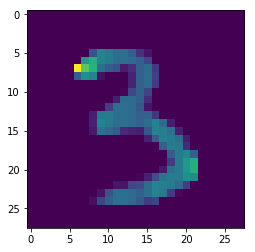

In [15]:
import matplotlib.pyplot as plt

plt.imshow(x_test[32])
plt.show